In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sb
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
from scipy.spatial import distance

# Kmeans 

In [2]:
df= pd.read_excel("all_Hist.xlsx")

In [3]:
df.head(5)

,ID,coop empty h,after CC,after CD,after DC,after DD,k5,k6,HCDDC,HCCDD,ALL,ALL.1
0,10,1.00,1.000000,1.000000,1.0,1.000000,AC,4,2,2,3,0
1,3,1.00,0.888889,0.000000,1.0,0.083333,TFT,3,3,3,5,1
2,12,0.75,0.666667,0.666667,0.0,0.000000,GR,0,3,3,5,1
3,2,0.00,1.000000,0.333333,1.0,0.076923,STFT,5,3,3,3,0
4,1,0.00,0.000000,0.000000,0.0,0.000000,AD,1,2,2,4,0


In [4]:
df = df[df['ALL.1']==1]

In [5]:
df.shape

(683, 12)

In [6]:
df2 = df[['coop empty h','after CC','after CD','after DC','after DD']]

C:\Users\itayt\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



The optimal number of clusters is: 3


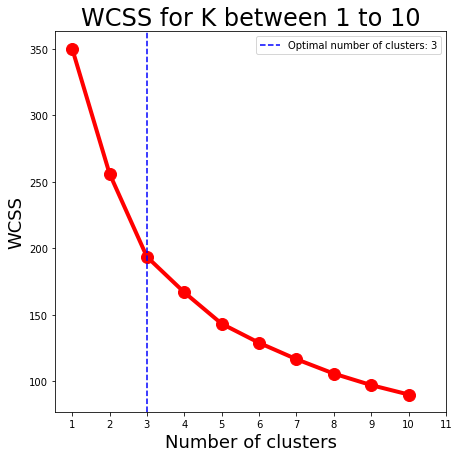

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# נתונים
x = df2.iloc[:, [0, 1, 2, 3, 4]].values

# חישוב WCSS עבור מספר קלאסטרים שונים
WCSS = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=100)
    model.fit(x)
    WCSS.append(model.inertia_)

# חיפוש נקודת הברך
kneedle = KneeLocator(range(1, 11), WCSS, curve='convex', direction='decreasing')
knee_point = kneedle.elbow

# הצגת התוצאות
print(f"The optimal number of clusters is: {knee_point}")

# הצגת גרף
fig = plt.figure(figsize=(7, 7))
plt.plot(range(1, 11), WCSS, linewidth=4, markersize=12, marker='o', color='red')
plt.xticks(np.arange(1, 12))
plt.xlabel("Number of clusters", fontsize=18)
plt.ylabel("WCSS", fontsize=18)
plt.title("WCSS for K between 1 to 10", fontsize=24)
plt.axvline(x=knee_point, color='blue', linestyle='--', label=f'Optimal number of clusters: {knee_point}')
plt.legend()
plt.show()


In [8]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10000, random_state = 0)
y_clusters = model.fit_predict(x)

In [9]:
df['class5'] = y_clusters

In [10]:
model2 = KMeans(n_clusters = 6, init = "k-means++", max_iter = 300, n_init = 10000, random_state = 0)
y_clusters2 = model2.fit_predict(x)

In [11]:
df['class6'] = y_clusters2

In [12]:
df.head()

,ID,coop empty h,after CC,after CD,after DC,after DD,k5,k6,HCDDC,HCCDD,ALL,ALL.1,class5,class6
1,3,1.00,0.888889,0.000000,1.000000,0.083333,TFT,3,3,3,5,1,4,2
2,12,0.75,0.666667,0.666667,0.000000,0.000000,GR,0,3,3,5,1,1,3
6,5,0.25,0.096774,0.000000,0.666667,0.000000,AD,1,3,2,5,1,0,4
10,9,0.00,0.000000,0.000000,0.000000,0.000000,AD,1,2,2,5,1,0,4
11,11,0.50,1.000000,0.400000,1.000000,0.000000,STFT,5,3,3,5,1,4,2


In [13]:
df.to_excel("All hist k5 and k6.xlsx")

In [14]:

mode = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 1000, random_state = 0)
y5_clusters = mode.fit_predict(x)

#mode = KMeans(n_clusters = 6, init = "k-means++", max_iter = 300, n_init = 10000, random_state = 0)
#y6_clusters = mode.fit_predict(x)

#mode = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10000, random_state = 0)
#y4_clusters = mode.fit_predict(x)

#mode = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10000, random_state = 0)
#y3_clusters = mode.fit_predict(x)

#mode = KMeans(n_clusters = 7, init = "k-means++", max_iter = 300, n_init = 10000, random_state = 0)
#y7_clusters = mode.fit_predict(x)

#mode = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10000, random_state = 0)
#y2_clusters = mode.fit_predict(x)

In [15]:
print(sum(y5_clusters==0))
print(sum(y5_clusters==1))
print(sum(y5_clusters==2))
print(sum(y5_clusters==3))
print(sum(y5_clusters==4))

45
94
214
153
177


In [16]:
#df['K2'] = y2_clusters
#df['K3'] = y3_clusters
#df['K4'] = y4_clusters
#df['K5'] = y5_clusters
#df['K6'] = y6_clusters
#df['K7'] = y7_clusters

# MLE

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from numpy import log as ln

In [99]:
data = pd.read_excel("MLE 2nd.xlsx")

In [100]:
AC50, AC5CC, AC5CD, AC5DC, AC5DD =0.928332537,0.988446156,0.601626016,0.801724138,0.788888889
AD50, AD5CC, AD5CD, AD5DC, AD5DD =0.040998767,0.164179104,0.110144928,0.065970313,0.013661649
GRIM50, GRIM5CC, GRIM5CD, GRIM5DC, GRIM5DD=0.768981648,0.940191388,0.25307377,0.13459268,0.052395629
STFT50, STFT5CC, STFT5CD, STFT5DC, STFT5DD= 0.16256336,0.965789474,0.427003293,0.725708502,0.077686771
TFT50, TFT5CC, TFT5CD, TFT5DC, TFT5DD =  0.91059769,0.981901097,0.284408602,0.811428571,0.048748781


In [101]:
def MLE_K5 (data,AC0, ACCC, ACCD, ACDC, ACDD,
            AD0, ADCC, ADCD, ADDC, ADDD,
            GRIM0, GRIMCC, GRIMCD, GRIMDC, GRIMDD,
            STFT0, STFTCC, STFTCD, STFTDC, STFTDD,
            TFT0, TFTCC, TFTCD, TFTDC, TFTDD):
    
    
    for i in range(data.shape[0]):
       
        if data.iloc[i]['round'] == 1:
            if data.iloc[i]['coop'] == 'coop':
                data.loc[i, "AC"] = abs(ln(AC0))
                data.loc[i, "AD"] = abs(ln(AD0))
                data.loc[i, "GRIM"] = abs(ln(GRIM0))
                data.loc[i, "STFT"] = abs(ln(STFT0))
                data.loc[i, "TFT"] = abs(ln(TFT0))

            else:
                data.loc[i, "AC"] = abs(ln(1-AC0))
                data.loc[i, "AD"] = abs(ln(1-AD0))
                data.loc[i, "GRIM"] = abs(ln(1-GRIM0))
                data.loc[i, "STFT"] = abs(ln(1-STFT0))
                data.loc[i, "TFT"] = abs(ln(1-TFT0))

         
        
        else:
       
            if (data.iloc[i-1]['ocoop'] == "coop" and  data.iloc[i-1]['coop'] == "coop"):
                if  data.iloc[i]['coop'] == "coop":
                    data.loc[i, "AD"] = abs(ln(ADCC))
                    data.loc[i, "STFT"] = abs(ln(STFTCC))
                    data.loc[i, "GRIM"] = abs(ln(GRIMCC))
                    data.loc[i, "TFT"] = abs(ln(TFTCC))
                    data.loc[i, "AC"] = abs(ln(ACCC))
                else:
                    data.loc[i, "AD"] = abs(ln(1-ADCC))
                    data.loc[i, "STFT"] = abs(ln(1-STFTCC))
                    data.loc[i, "GRIM"] = abs(ln(1-GRIMCC))
                    data.loc[i, "TFT"] = abs(ln(1-TFTCC))
                    data.loc[i, "AC"] = abs(ln(1-ACCC))

            
            elif (data.iloc[i-1]['ocoop'] == "defect" and  data.iloc[i-1]['coop'] == "coop"):
                if  data.iloc[i]['coop'] == "coop":
                    data.loc[i, "AD"] = abs(ln(ADCD))
                    data.loc[i, "STFT"] = abs(ln(STFTCD))
                    data.loc[i, "GRIM"] = abs(ln(GRIMCD))
                    data.loc[i, "TFT"] = abs(ln(TFTCD))
                    data.loc[i, "AC"] = abs(ln(ACCD))
                else:
                    data.loc[i, "AD"] = abs(ln(1-ADCD))
                    data.loc[i, "STFT"] = abs(ln(1-STFTCD))
                    data.loc[i, "GRIM"] = abs(ln(1-GRIMCD))
                    data.loc[i, "TFT"] = abs(ln(1-TFTCD))
                    data.loc[i, "AC"] = abs(ln(1-ACCD))

                    
            elif (data.iloc[i-1]['ocoop'] == "coop" and  data.iloc[i-1]['coop'] == "defect"):
                if  data.iloc[i]['coop'] == "coop":
                    data.loc[i, "AD"] = abs(ln(ADDC))
                    data.loc[i, "STFT"] = abs(ln(STFTDC))
                    data.loc[i, "GRIM"] = abs(ln(GRIMDC))
                    data.loc[i, "TFT"] = abs(ln(TFTDC))
                    data.loc[i, "AC"] = abs(ln(ACDC))
                else:
                    data.loc[i, "AD"] = abs(ln(1-ADDC))
                    data.loc[i, "STFT"] = abs(ln(1-STFTDC))
                    data.loc[i, "GRIM"] = abs(ln(1-GRIMDC))
                    data.loc[i, "TFT"] = abs(ln(1-TFTDC))
                    data.loc[i, "AC"] = abs(ln(1-ACDC))

                    
            else:
                if (data.iloc[i-1]['ocoop'] == "defect" and  data.iloc[i-1]['coop'] == "defect"):
                    if  data.iloc[i]['coop'] == "coop":
                        data.loc[i, "AD"] = abs(ln(ADDD))
                        data.loc[i, "STFT"] = abs(ln(STFTDD))
                        data.loc[i, "GRIM"] = abs(ln(GRIMDD))
                        data.loc[i, "TFT"] = abs(ln(TFTDD))
                        data.loc[i, "AC"] = abs(ln(ACDD))
                    else:
                        data.loc[i, "AD"] = abs(ln(1-ADDD))
                        data.loc[i, "STFT"] = abs(ln(1-STFTDD))
                        data.loc[i, "GRIM"] = abs(ln(1-GRIMDD))
                        data.loc[i, "TFT"] = abs(ln(1-TFTDD))
                        data.loc[i, "AC"] = abs(ln(1-ACDD))
                        
    return(data)

def MLE_calculate_k5(data):
    table = pd.pivot_table(data, values=["AC",'AD',"GRIM","STFT","TFT"], index=['ID'], aggfunc=np.sum)
    return (table)

def MLE_min_k5 (data):
    mle = sum(data.min(axis=1))
    data['min'] = data.min(axis=1)
    return (mle,data)

def Cluster_k5 (data):
    cluster = []
    for i in range (data.shape[0]):
        if data.iloc[i]['AC']== data.iloc[i]['min']:
            cluster.append(1)
        if data.iloc[i]['AD']== data.iloc[i]['min']:
            cluster.append(2)
        if data.iloc[i]['GRIM']== data.iloc[i]['min']:
            cluster.append(3)
        if data.iloc[i]['STFT']== data.iloc[i]['min']:
            cluster.append(4)
        if data.iloc[i]['TFT']== data.iloc[i]['min']:
            cluster.append(5)
            
    data['class'] = cluster
    return(data)

def vLookup_k5 (data,table):
    data = pd.merge(data, table['class'], on ='ID', how ='inner',)
    return (data)

def change_class (df1,df2,fit=0):
    for i in range (df2.shape[0]):
        if df2.iloc[i]['class']== df1.iloc[i]['class']:
            fit+=1
    return (fit/1734)

def N_class_k5 (data):
    table2 = pd.pivot_table(data, values=["class"], index=['ID'], aggfunc=np.mean)
    
    class1 = sum(table2['class'] == 1)
    class2 = sum(table2['class'] == 2)
    class3 = sum(table2['class'] == 3)
    class4 = sum(table2['class'] == 4)
    class5 = sum(table2['class'] == 5)
    
    return(class1,class2,class3,class4,class5)

def vector_k5 (data):
    table2 = pd.pivot_table(data, values=['roundone','aftercc','aftercd', 'afterdc', 'afterdd'],
                        index=["class"], aggfunc=np.mean) 
    AC50, AC5CC, AC5CD, AC5DC, AC5DD = table2.iloc[0,4],table2.iloc[0,0],table2.iloc[0,1],table2.iloc[0,2],table2.iloc[0,3]
    AD50, AD5CC, AD5CD, AD5DC, AD5DD =table2.iloc[1,4],table2.iloc[1,0],table2.iloc[1,1],table2.iloc[1,2],table2.iloc[1,3]
    GRIM50, GRIM5CC, GRIM5CD, GRIM5DC, GRIM5DD = table2.iloc[2,4],table2.iloc[2,0],table2.iloc[2,1],table2.iloc[2,2],table2.iloc[2,3]
    STFT50, STFT5CC, STFT5CD, STFT5DC, STFT5DD = table2.iloc[3,4],table2.iloc[3,0],table2.iloc[3,1],table2.iloc[3,2],table2.iloc[3,3]
    TFT50, TFT5CC, TFT5CD, TFT5DC, TFT5DD = table2.iloc[4,4],table2.iloc[4,0],table2.iloc[4,1],table2.iloc[4,2],table2.iloc[4,3]
    
    return(AC50, AC5CC, AC5CD, AC5DC, AC5DD,AD50, AD5CC, AD5CD, AD5DC, AD5DD
           ,GRIM50, GRIM5CC, GRIM5CD, GRIM5DC, GRIM5DD,
           STFT50, STFT5CC, STFT5CD, STFT5DC, STFT5DD,TFT50, TFT5CC, TFT5CD, TFT5DC, TFT5DD)


In [102]:
def Main_MLE5 (data,AC50,AC5CC, AC5CD, AC5DC, AC5DD,
               AD50, AD5CC, AD5CD, AD5DC, AD5DD,
               GRIM50, GRIM5CC,GRIM5CD, GRIM5DC, GRIM5DD,
               STFT50, STFT5CC, STFT5CD, STFT5DC, STFT5DD,
               TFT50, TFT5CC, TFT5CD, TFT5DC, TFT5DD):
    
    class115 = []
    class225 = []
    class335 = []
    class445 = []
    class555 = []
    fit = []
    MLE5 =[]
    
    
    for i in range (1) :
        
        if i >10 :
            
            # חישוב הנראות לכל וקטור
            df = MLE_K5(data,AC50, AC5CC, AC5CD, AC5DC, AC5DD,
                        AD50, AD5CC, AD5CD, AD5DC, AD5DD,
                        GRIM50, GRIM5CC, GRIM5CD, GRIM5DC, GRIM5DD,
                        STFT50, STFT5CC, STFT5CD, STFT5DC, STFT5DD,
                        TFT50, TFT5CC, TFT5CD, TFT5DC, TFT5DD)

            # חישוב הפיבות תייבל לקבלת הסכום של הנראות לכל אסטרטגיה לכל שחקן
            table = MLE_calculate_k5 (df)

            # חישוב הנראות לווקטור ושמירתו במשתנה והוספת עמודה שמכילה את המינמום לכל שחקן
            mle , table = MLE_min_k5(table)

            # בחירת האסטרטגיה שהיא המינימום
            df_cluster = Cluster_k5(table)
            
            # מציאת אחוז ההתאמה 
            fitt = change_class(df_cluster_2,df_cluster,fit=0)

            # איחוד לטבלה המרכזית את הקלאסר לכל שחקן
            df_vlook = vLookup_k5 (df, table)

            # כמה שחקנים בכל קבוצה - בחינת השינויים לאורך זמן
            class15,class25,class35,class45,class55 = N_class_k5 (df_vlook)

            
        else:
            
             # חישוב הנראות לכל וקטור
            df = MLE_K5(data,AC50, AC5CC, AC5CD, AC5DC, AC5DD,
                        AD50, AD5CC, AD5CD, AD5DC, AD5DD,
                        GRIM50, GRIM5CC, GRIM5CD, GRIM5DC, GRIM5DD,
                        STFT50, STFT5CC, STFT5CD, STFT5DC, STFT5DD,
                        TFT50, TFT5CC, TFT5CD, TFT5DC, TFT5DD)

            # חישוב הפיבות תייבל לקבלת הסכום של הנראות לכל אסטרטגיה לכל שחקן
            table = MLE_calculate_k5 (df)

            # חישוב הנראות לווקטור ושמירתו במשתנה והוספת עמודה שמכילה את המינמום לכל שחקן
            mle , table = MLE_min_k5(table)

            # בחירת האסטרטגיה שהיא המינימום
            df_cluster = Cluster_k5(table)
            
            df_cluster_2 = df_cluster
            
            # מציאת אחוז ההתאמה 
            fitt = 1

            # איחוד לטבלה המרכזית את הקלאסר לכל שחקן
            df_vlook = vLookup_k5 (df, table)

            # כמה שחקנים בכל קבוצה - בחינת השינויים לאורך זמן
            class15,class25,class35,class45,class55 = N_class_k5 (df_vlook)
            

        #הווקטור החדש
        AC50,AC5CC, AC5CD, AC5DC, AC5DD, AD50, AD5CC, AD5CD, AD5DC, AD5DD,GRIM50, GRIM5CC,GRIM5CD, GRIM5DC, GRIM5DD,STFT50, STFT5CC, STFT5CD, STFT5DC, STFT5DD,TFT50, TFT5CC, TFT5CD, TFT5DC, TFT5DD = vector_k5(df_vlook)
        
        
        fit.append(fitt)
        MLE5.append(mle)
        class115.append(class15)
        class225.append(class25)
        class335.append(class35)
        class445.append(class45)
        class555.append(class55)

    
    return(MLE5, class115,class225,class335,class445,class555,fit,AC50, AC5CC, AC5CD, AC5DC, AC5DD,AD50, AD5CC, AD5CD, AD5DC, AD5DD, GRIM50, GRIM5CC,GRIM5CD, GRIM5DC,GRIM5DD, TFT50, TFT5CC, TFT5CD, TFT5DC, TFT5DD,STFT50, STFT5CC, STFT5CD, STFT5DC, STFT5DD)


In [103]:
MLE5, class115,class225,class335,class445,class555,fit,AC50, AC5CC, AC5CD, AC5DC, AC5DD,AD50, AD5CC, AD5CD, AD5DC, AD5DD, GRIM50, GRIM5CC,GRIM5CD, GRIM5DC,GRIM5DD, TFT50, TFT5CC, TFT5CD, TFT5DC, TFT5DD,STFT50, STFT5CC, STFT5CD, STFT5DC, STFT5DD= Main_MLE5 (data,AC50,AC5CC, AC5CD, AC5DC, AC5DD, AD50, AD5CC, AD5CD, AD5DC, AD5DD,GRIM50, GRIM5CC,GRIM5CD, GRIM5DC, GRIM5DD, STFT50, STFT5CC, STFT5CD, STFT5DC, STFT5DD,TFT50, TFT5CC, TFT5CD, TFT5DC, TFT5DD)

In [104]:
print(MLE5)

[14917.260419908935]


# Plots

In [18]:
df= pd.read_excel("After Kmeans 5.xlsx")

In [19]:
df.head()

,ID,coop empty h,after CC,after CD,after DC,after DD,kname,HCDDC,HCCDD
0,10,1.00,1.000000,1.000000,1.0,1.000000,AC,2,2
1,3,1.00,0.888889,0.000000,1.0,0.083333,TFT,3,3
2,12,0.75,0.666667,0.666667,0.0,0.000000,GR,3,3
3,2,0.00,1.000000,0.333333,1.0,0.076923,STFT,3,3
4,1,0.00,0.000000,0.000000,0.0,0.000000,AD,2,2


In [20]:
df33 = df[['coop empty h','after CC','after CD','after DC','after DD','kname']]

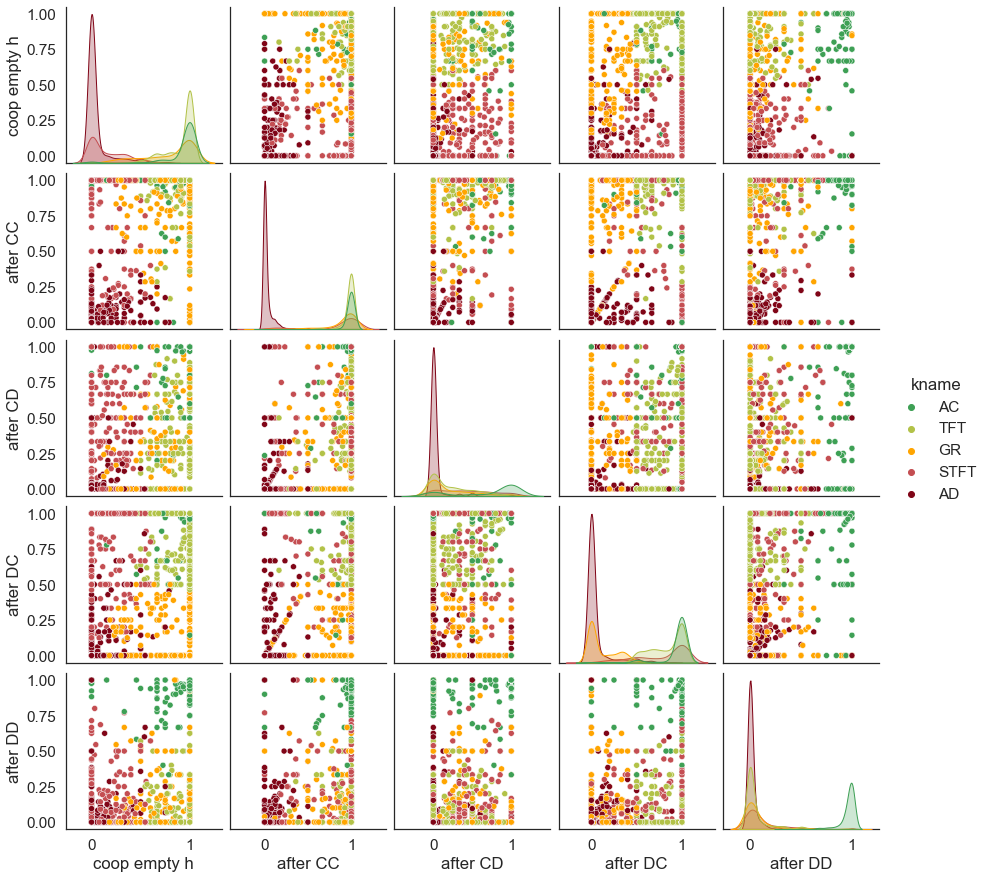

In [21]:

# Set font scale and style
sns.set(font_scale=1.4)
sns.set_style("white")

# Define color palette
palette = ['#3EA055', '#B2C248', '#FFA500', 'r', '#800517']

# Create pair plot with normalized kernel density plots on the diagonal
sns.pairplot(df33, hue='kname', palette=palette, corner=False, height=2.5, aspect=1, diag_kind='kde')


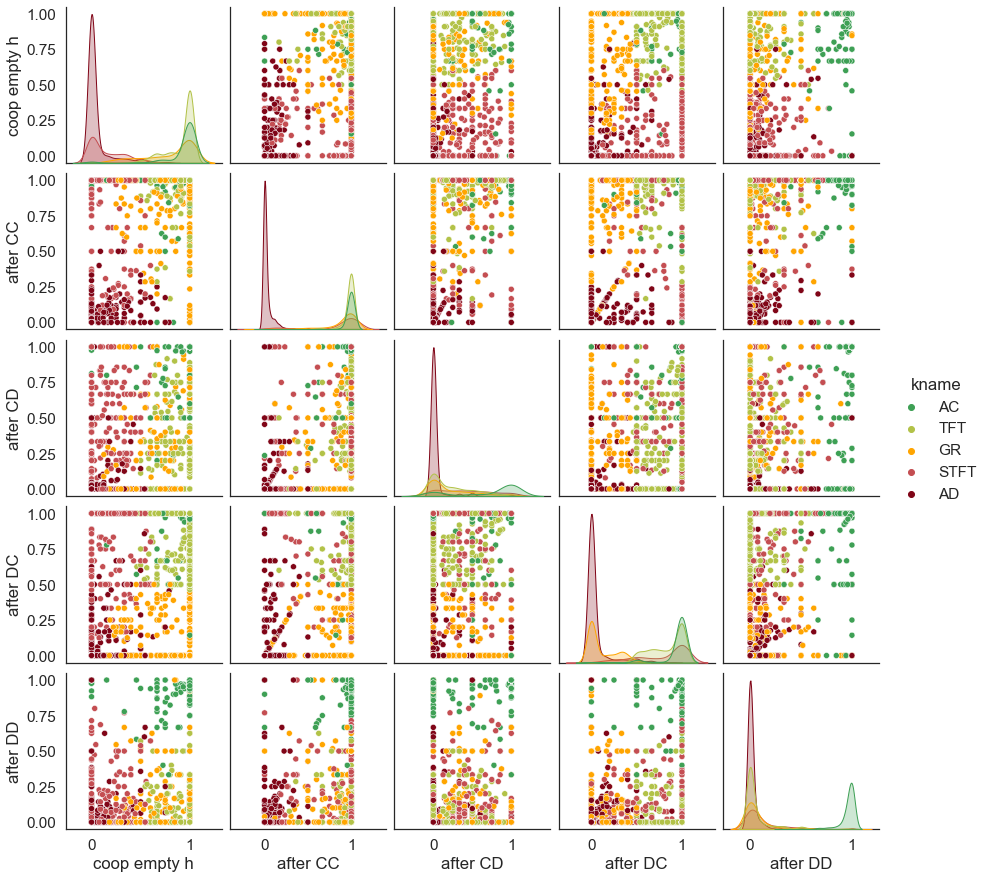

In [22]:
sns.set(font_scale=1.4)
sns.set_style("white")

# Define color palette
palette = ['#3EA055', '#B2C248', '#FFA500', 'r', '#800517']

# Create pair plot with normalized kernel density plots on the diagonal
pairplot = sns.pairplot(df33, hue='kname', palette=palette, corner=False, height=2.5, aspect=1, diag_kind='kde')

# Save the plot as an image (change the path if needed)
pairplot.savefig('pairplot.png')

# Show the plot (optional)
plt.show()

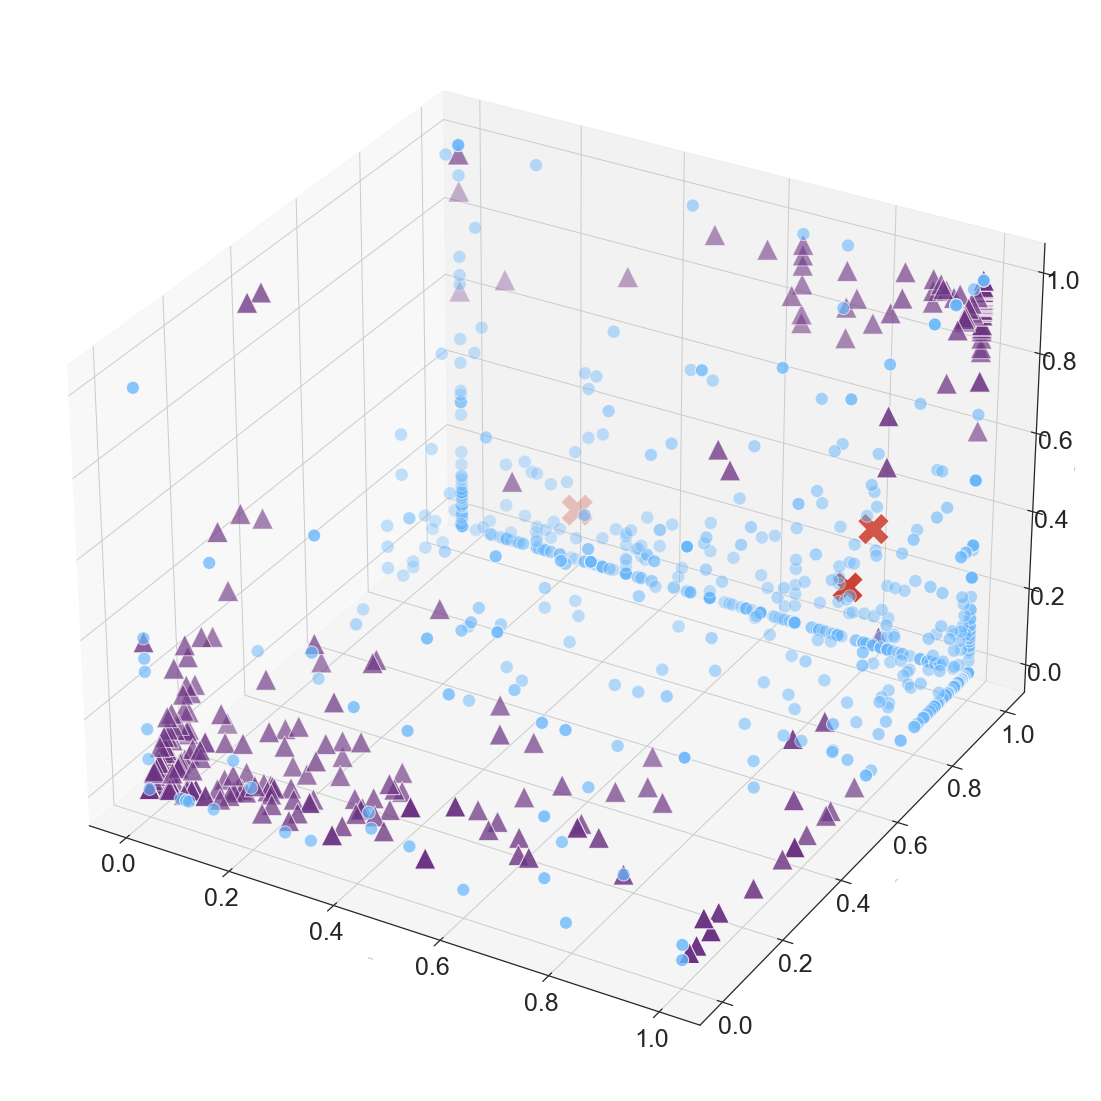

In [109]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

df33 = df[df['HCCDD']==3]
x33 = df33['coop empty h']
y33 = df33['after CC']
z33 = df33['after DD']

df22 = df[df['HCCDD']==2]
x22 = df22['coop empty h']
y22 = df22['after CC']
z22 = df22['after DD']

df11 = df[df['HCCDD']==1]
x11 = df11['coop empty h']
y11 = df11['after CC']
z11 = df11['after DD']

fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')

ax.scatter3D(x33, y33, z33, edgecolor='snow', c='#69B7FC', s=170)
ax.scatter3D(x22, y22, z22, edgecolor='snow', c='#6C3483', s=450, marker="^")
ax.scatter3D(x11, y11, z11, edgecolor='snow', c='#CB4335', s=1000, marker="X")

ax.tick_params(axis='both', which='major', labelsize=25)

ax.set_xlabel('empty history', fontsize=0)
ax.set_ylabel('After CD', fontsize=0)
ax.set_zlabel('After DC', fontsize=0)

plt.show()

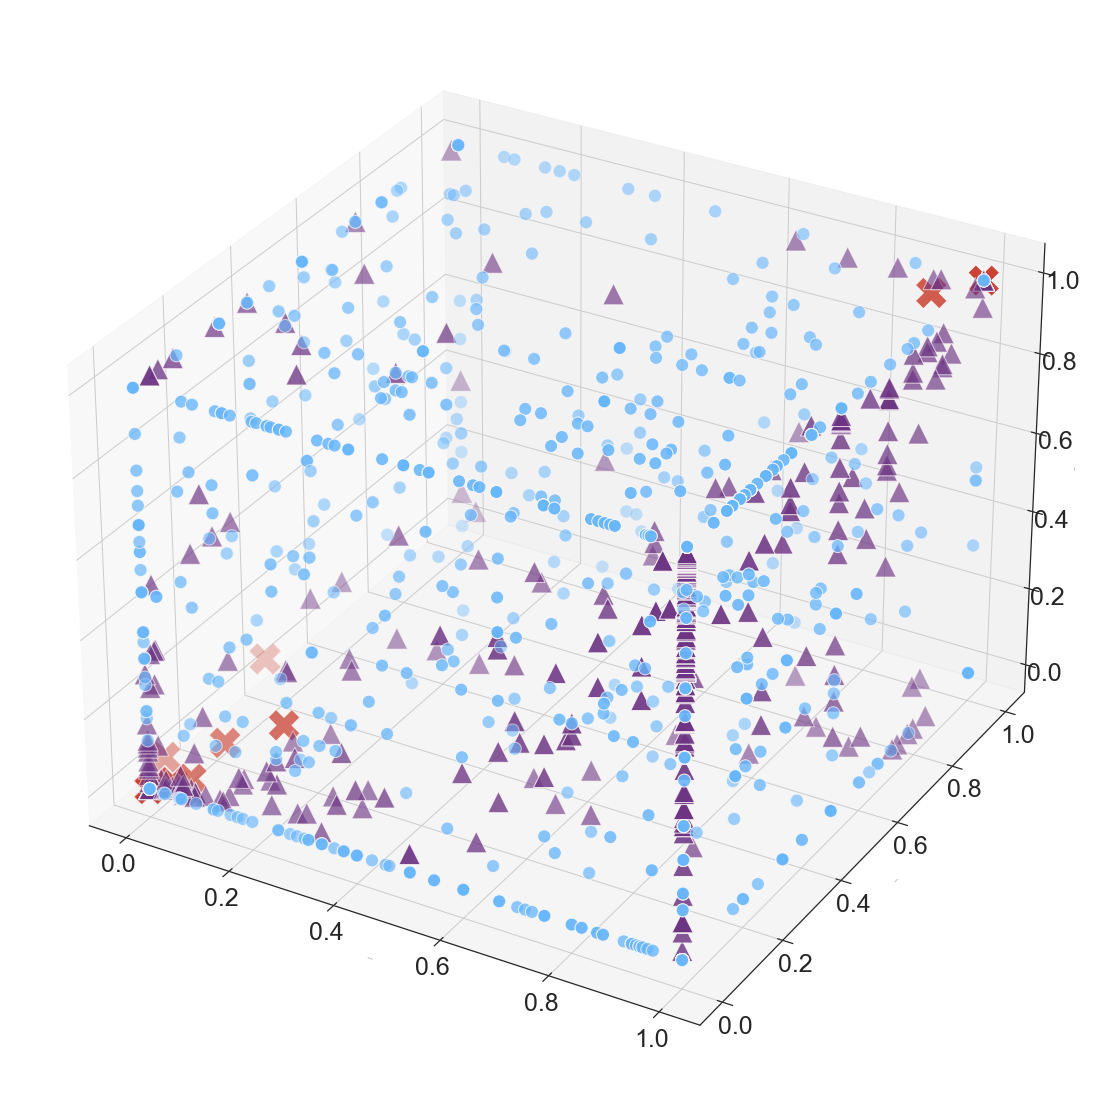

In [110]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

df33 = df[df['HCDDC']==3]
x33 = df33['coop empty h']
y33 = df33['after CD']
z33 = df33['after DC']

df22 = df[df['HCDDC']==2]
x22 = df22['coop empty h']
y22 = df22['after CD']
z22 = df22['after DC']

df11 = df[df['HCDDC']==1]
x11 = df11['coop empty h']
y11 = df11['after CD']
z11 = df11['after DC']

fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')

ax.scatter3D(x33, y33, z33, edgecolor='snow', c='#69B7FC', s=170)
ax.scatter3D(x22, y22, z22, edgecolor='snow', c='#6C3483', s=450, marker="^")
ax.scatter3D(x11, y11, z11, edgecolor='snow', c='#CB4335', s=1000, marker="X")

ax.tick_params(axis='both', which='major', labelsize=25)

ax.set_xlabel('empty history', fontsize=0)
ax.set_ylabel('After CD', fontsize=0)
ax.set_zlabel('After DC', fontsize=0)

plt.show()


In [111]:
df.head()

,ID,coop empty h,after CC,after CD,after DC,after DD,kname,HCDDC,HCCDD
0,10,1.00,1.000000,1.000000,1.0,1.000000,AC,2,2
1,3,1.00,0.888889,0.000000,1.0,0.083333,TFT,3,3
2,12,0.75,0.666667,0.666667,0.0,0.000000,GR,3,3
3,2,0.00,1.000000,0.333333,1.0,0.076923,STFT,3,3
4,1,0.00,0.000000,0.000000,0.0,0.000000,AD,2,2


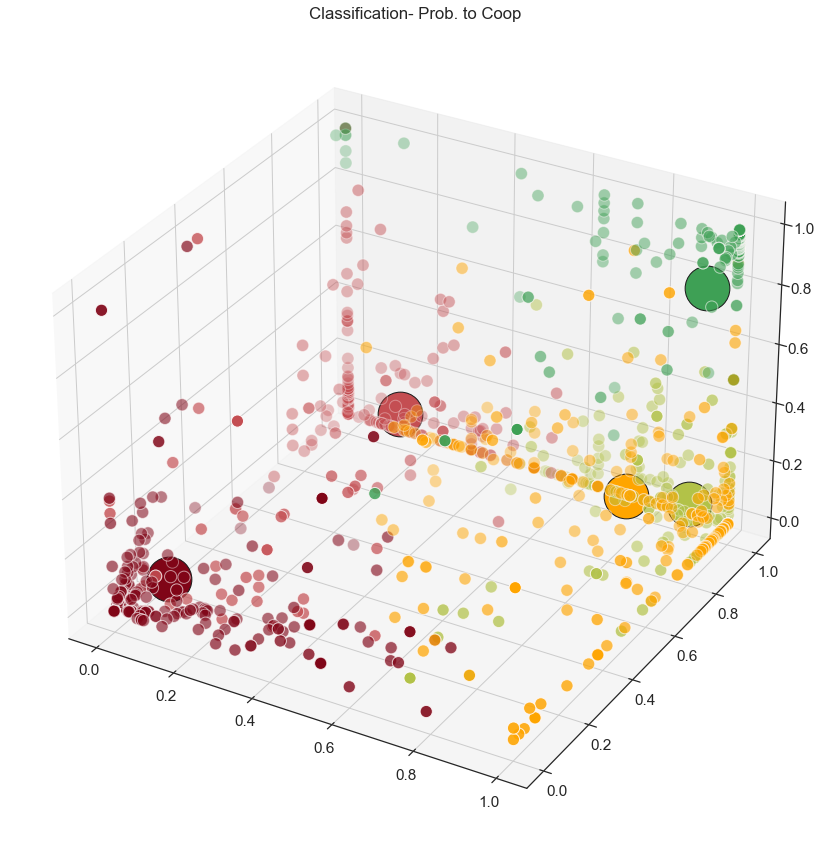

In [112]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

df1 = df[df['kname']=='AD']
x1 = df1['coop empty h']
y1 = df1['after CC']
z1 = df1['after DD']

df2 = df[df['kname']=='STFT']
x2 = df2['coop empty h']
y2 = df2['after CC']
z2 = df2['after DD']

df3 = df[df['kname']=='GR']
x3 = df3['coop empty h']
y3 = df3['after CC']
z3 = df3['after DD']

df4 = df[df['kname']=='TFT']
x4 = df4['coop empty h']
y4 = df4['after CC']
z4 = df4['after DD']

df0 = df[df['kname']=='AC']
x0 = df0['coop empty h']
y0 = df0['after CC']
z0 = df0['after DD']



fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')


ax.scatter3D(x0, y0, z0, edgecolor = 'snow',c = '#3EA055',s=150) #AC
ax.scatter3D(x1, y1, z1, edgecolor = 'snow', c = '#800517',s=150) #AD
ax.scatter3D(x2, y2, z2, edgecolor = 'snow',c = 'r',s=150) #STFT
ax.scatter3D(x3, y3, z3, edgecolor = 'snow',c = '#FFA500',s=150) #GR
ax.scatter3D(x4, y4, z4, edgecolor = 'snow',c = '#B2C248',s =150) #TFT


ax.scatter3D(0.04, 0.16, 0.01, edgecolor = 'k',c = '#800517',s=2000)
ax.scatter3D(0.16, 0.97, 0.08, edgecolor = 'k',c = 'r',s=2000)
ax.scatter3D(0.77, 0.94, 0.05, edgecolor = 'k',c = '#FFA500',s=2000)
ax.scatter3D(0.91, 0.98, 0.05, edgecolor = 'k',c = '#B2C248',s=2000)
ax.scatter3D(0.93, 0.99, 0.79, edgecolor = 'k',c = '#3EA055',s=2000)

#ax.set_xlabel('empty history', fontsize=22, rotation=150)
#ax.set_ylabel('After CC', fontsize=22, rotation=150)
#ax.set_zlabel('After DD', fontsize=22, rotation=150)
#plt.legend(['AD','STFT','GRIM','TFT','AC'])
plt.title("Classification- Prob. to Coop")

plt.show()

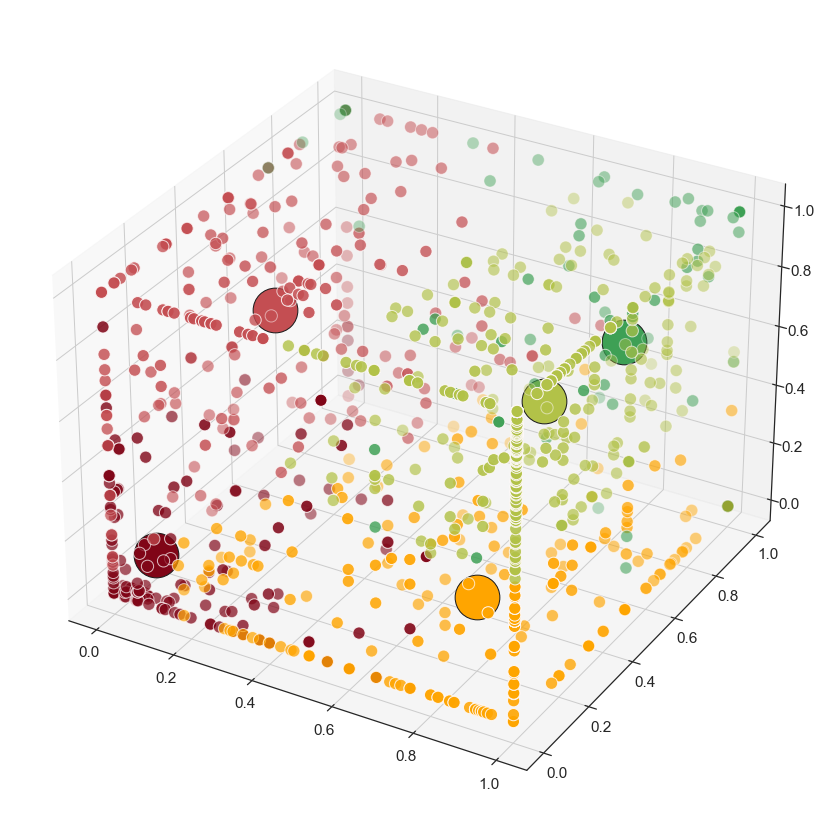

In [113]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

df1 = df[df['kname']=='AD']
x1 = df1['coop empty h']
y1 = df1['after CD']
z1 = df1['after DC']

df2 = df[df['kname']=='STFT']
x2 = df2['coop empty h']
y2 = df2['after CD']
z2 = df2['after DC']

df3 = df[df['kname']=='GR']
x3 = df3['coop empty h']
y3 = df3['after CD']
z3 = df3['after DC']

df4 = df[df['kname']=='TFT']
x4 = df4['coop empty h']
y4 = df4['after CD']
z4 = df4['after DC']

df0 = df[df['kname']=='AC']
x0 = df0['coop empty h']
y0 = df0['after CD']
z0 = df0['after DC']



fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')


ax.scatter3D(x0, y0, z0, edgecolor = 'snow',c = '#3EA055',s=150) #AC
ax.scatter3D(x1, y1, z1, edgecolor = 'snow', c = '#800517',s=150) #AD
ax.scatter3D(x2, y2, z2, edgecolor = 'snow',c = 'r',s=150) #STFT
ax.scatter3D(x3, y3, z3, edgecolor = 'snow',c = '#FFA500',s=150) #GR
ax.scatter3D(x4, y4, z4, edgecolor = 'snow',c = '#B2C248',s =150) #TFT


ax.scatter3D(0.04, 0.11, 0.07, edgecolor = 'k',c = '#800517',s=2000)
ax.scatter3D(0.16, 0.43, 0.73, edgecolor = 'k',c = 'r',s=2000)
ax.scatter3D(0.77, 0.25, 0.13, edgecolor = 'k',c = '#FFA500',s=2000)
ax.scatter3D(0.91, 0.28, 0.81, edgecolor = 'k',c = '#B2C248',s=2000)
ax.scatter3D(0.93, 0.60, 0.80, edgecolor = 'k',c = '#3EA055',s=2000)

#ax.set_xlabel('empty history', fontsize=22, rotation=500, linespacing=500)
#ax.set_ylabel('After CC', fontsize=22, rotation=150)
#ax.set_zlabel('After DD', fontsize=22, rotation=150)
#plt.legend(['AD','STFT','GRIM','TFT','AC'])
#plt.title("Classification- Prob. to Coop")

plt.show()

# Euclidean distance K=5

In [23]:
df = pd.read_excel("Euclidean distance.xlsx")

In [24]:
df.head(3)

,ID,coop empty h,after CC,after CD,after DC,after DD,kname,CE,CCC,CCD,CDC,CDD
0,10,1.00,1.000000,1.000000,1.0,1.000000,AC,4,9,18,0,0
1,3,1.00,0.888889,0.000000,1.0,0.083333,TFT,4,9,4,2,12
2,12,0.75,0.666667,0.666667,0.0,0.000000,GR,4,3,3,2,19


In [25]:
dfAC = df[['coop empty h','after CC','after CD','after DC','after DD','CE','CCC','CCD','CDC','CDD']][df['kname']=='AC'].reset_index().drop('index',axis=1)
dfAD = df[['coop empty h','after CC','after CD','after DC','after DD','CE','CCC','CCD','CDC','CDD']][df['kname']=='AD'].reset_index().drop('index',axis=1)
dfGRIM = df[['coop empty h','after CC','after CD','after DC','after DD','CE','CCC','CCD','CDC','CDD']][df['kname']=='GR'].reset_index().drop('index',axis=1)
dfTFT = df[['coop empty h','after CC','after CD','after DC','after DD','CE','CCC','CCD','CDC','CDD']][df['kname']=='TFT'].reset_index().drop('index',axis=1)
dfSTFT = df[['coop empty h','after CC','after CD','after DC','after DD','CE','CCC','CCD','CDC','CDD']][df['kname']=='STFT'].reset_index().drop('index',axis=1)

In [26]:
C_AC = [0.928332537,0.988446156,0.601626016,0.801724138,0.788888889]
C_AD = [0.040998767,0.164179104,0.110144928,0.065970313,0.013661649]
C_GRIM = [0.768981648,0.940191388,0.25307377,0.13459268,0.052395629]
C_TFT = [0.91059769,0.981901097,0.284408602,0.811428571,0.048748781]
C_STFT = [0.16256336,0.965789474,0.427003293,0.725708502,0.077686771]

In [27]:
DISAC = []
DISGRIM = []
DISAD = []
DISTFT = []
DISSTFT = []


for i in range (dfAC.shape[0]):
    values= dfAC.values[i:i+1, 5:10]
    x2 = ((values - values.min()) / (values - values.min()).sum())*(5)
    DISAC.append(distance.euclidean(u=dfAC.values[i:i+1, :5] ,v=C_AC,w=x2))

    
for i in range (dfAD.shape[0]):
    values= dfAD.values[i:i+1, 5:10]
    x2 = ((values - values.min()) / (values - values.min()).sum())*(5)
    DISAD.append(distance.euclidean(u=dfAD.values[i:i+1, :5] ,v=C_AD,w=x2))

for i in range (dfGRIM.shape[0]):
    values= dfGRIM.values[i:i+1, 5:10]
    x2 = ((values - values.min()) / (values - values.min()).sum())*(5)
    DISGRIM.append(distance.euclidean(u=dfGRIM.values[i:i+1, :5] ,v=C_GRIM,w=x2))


for i in range (dfTFT.shape[0]):
    values= dfTFT.values[i:i+1, 5:10]
    x2 = ((values - values.min()) / (values - values.min()).sum())*(5)
    DISTFT.append(distance.euclidean(u=dfTFT.values[i:i+1, :5] ,v=C_TFT,w=x2))

for i in range (dfSTFT.shape[0]):
    values= dfSTFT.values[i:i+1, 5:10]
    x2 = ((values - values.min()) / (values - values.min()).sum())*(5)
    DISSTFT.append(distance.euclidean(u=dfSTFT.values[i:i+1, :5] ,v=C_STFT,w=x2))


In [28]:
print("AC:")
print("mean: ", np.mean(DISAC))
print("median: ",np.median(DISAC))
print("std: ",np.std(DISAC))
print("----------------------------")

print("AD:")
print("mean: ", np.mean(DISAD))
print("median: ",np.median(DISAD))
print("std: ",np.std(DISAD))
print("----------------------------")


print("GR:")
print("mean: ", np.mean(DISGRIM))
print("median: ",np.median(DISGRIM))
print("std: ",np.std(DISGRIM))
print("----------------------------")


print("TFT:")
print("mean: ", np.mean(DISTFT))
print("median: ",np.median(DISTFT))
print("std: ",np.std(DISTFT))
print("----------------------------")


print("STFT:")
print("mean: ", np.mean(DISSTFT))
print("median: ",np.median(DISSTFT))
print("std: ",np.std(DISSTFT))
print("----------------------------")

AC:
mean:  0.24570451637128668
median:  0.1847755684979497
std:  0.23435667894309636
----------------------------
AD:
mean:  0.14447583889136828
median:  0.07382805644424843
std:  0.17231634660255277
----------------------------
GR:
mean:  0.35312797303280613
median:  0.2973160353024205
std:  0.18688794143507187
----------------------------
TFT:
mean:  0.25518661172112816
median:  0.21763157831430727
std:  0.14699631181351425
----------------------------
STFT:
mean:  0.33772945264233717
median:  0.2935077584265551
std:  0.18295181048291212
----------------------------


C:\Users\itayt\AppData\Local\Temp\ipykernel_7104\3751510550.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator



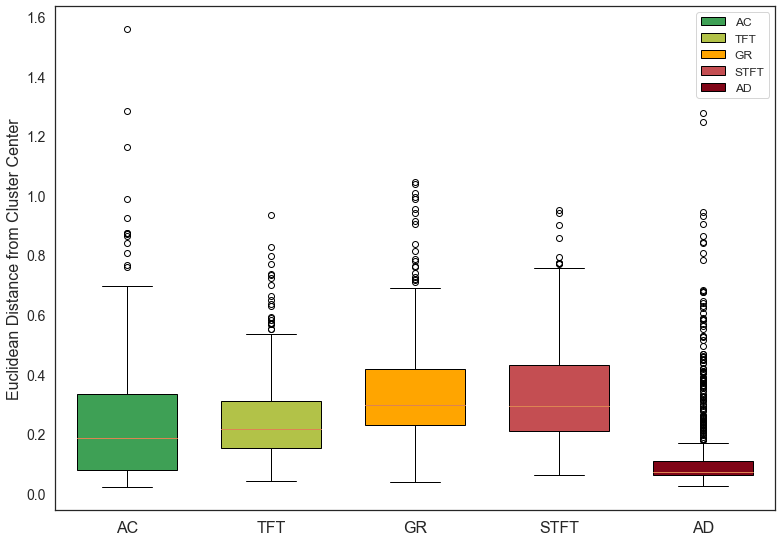

In [29]:

# List of data for boxplot
data_1 = DISAC
data_2 = DISTFT
data_3 = DISGRIM
data_4 = DISSTFT
data_5 = DISAD

data = [data_1, data_2, data_3, data_4, data_5]

# Color palette
palette = ['#3EA055', '#B2C248', '#FFA500', 'r', '#800517']

# Boxplot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data, patch_artist=True, widths=0.7)

# Set legend and colors
legend_labels = ['AC', 'TFT', 'GR', 'STFT', 'AD']
for box, label, color in zip(bp['boxes'], legend_labels, palette):
    box.set_facecolor(color)

ax.set_xticklabels(legend_labels, fontsize=16)  # Set x-axis label font size
ax.set_yticklabels([round(val, 2) for val in ax.get_yticks()], fontsize=14)  # Round y-axis labels to 2 decimal places and set font size
ax.set_xticks([1, 2, 3, 4, 5])

# Adding legend with specified font size
plt.legend(bp["boxes"], legend_labels, loc='upper right', prop={'size': 12})

# Set y-axis label with improved text and font size
ax.set_ylabel('Euclidean Distance from Cluster Center', fontsize=16)

# Show the plot
plt.show()